In [1]:
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


In [2]:
#load stock data
stock=yf.Ticker("NVDA")
stock=stock.history(period= "max")

In [3]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-31 00:00:00-04:00,105.129997,110.959999,103.650002,108.379997,299212700,0.0,0.0
2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0
2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0


In [4]:
stock.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [5]:
nvda = stock.reset_index()

In [6]:
nvda.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object

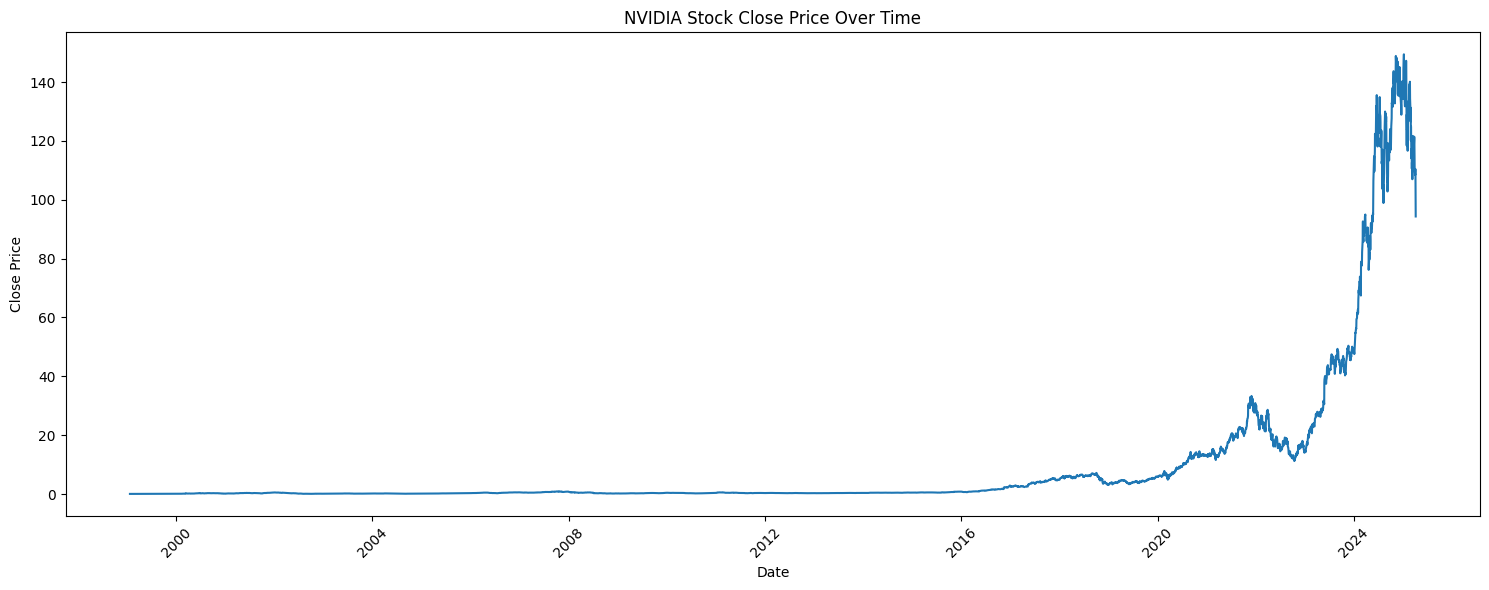

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(nvda['Date'], nvda['Close'])
plt.title('NVIDIA Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
nvda["Tomorrow"] = nvda["Close"].shift(-1)
nvda

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
0,1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.0,0.0,0.041552
1,1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.0,0.0,0.038328
2,1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.0,0.0,0.038209
3,1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.0,0.0,0.038089
4,1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.0,0.0,0.036298
...,...,...,...,...,...,...,...,...,...
6587,2025-03-31 00:00:00-04:00,105.129997,110.959999,103.650002,108.379997,299212700,0.0,0.0,110.150002
6588,2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0,110.419998
6589,2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0,101.800003
6590,2025-04-03 00:00:00-04:00,103.510002,105.629997,101.599998,101.800003,338769400,0.0,0.0,94.309998


In [10]:
nvda["Target"] = (nvda["Tomorrow"] > nvda["Close"]).astype(int)
nvda

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
0,1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.0,0.0,0.041552,1
1,1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.0,0.0,0.038328,0
2,1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.0,0.0,0.038209,0
3,1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.0,0.0,0.038089,0
4,1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.0,0.0,0.036298,0
...,...,...,...,...,...,...,...,...,...,...
6587,2025-03-31 00:00:00-04:00,105.129997,110.959999,103.650002,108.379997,299212700,0.0,0.0,110.150002,1
6588,2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0,110.419998,1
6589,2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0,101.800003,0
6590,2025-04-03 00:00:00-04:00,103.510002,105.629997,101.599998,101.800003,338769400,0.0,0.0,94.309998,0


In [11]:
nvda = nvda.loc["2000-01-01":].copy()
nvda

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
2001,2007-01-08 00:00:00-05:00,0.516272,0.528192,0.507407,0.518259,657270000,0.0,0.0,0.508172,0
2002,2007-01-09 00:00:00-05:00,0.519023,0.522537,0.507560,0.508172,764166000,0.0,0.0,0.533236,1
2003,2007-01-10 00:00:00-05:00,0.502822,0.537974,0.495181,0.533236,1108746000,0.0,0.0,0.531249,0
2004,2007-01-11 00:00:00-05:00,0.533236,0.537363,0.522537,0.531249,924504000,0.0,0.0,0.538433,1
2005,2007-01-12 00:00:00-05:00,0.523302,0.540572,0.520857,0.538433,698190000,0.0,0.0,0.539350,1
...,...,...,...,...,...,...,...,...,...,...
6587,2025-03-31 00:00:00-04:00,105.129997,110.959999,103.650002,108.379997,299212700,0.0,0.0,110.150002,1
6588,2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0,110.419998,1
6589,2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0,101.800003,0
6590,2025-04-03 00:00:00-04:00,103.510002,105.629997,101.599998,101.800003,338769400,0.0,0.0,94.309998,0


In [ ]:
#initiate model
model = RandomForestClassifier(n_estimators=100,min_samples_split=100, random_state=42)
train = nvda.iloc[:-100]
test= nvda.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [14]:
predictions = model.predict(test[predictors])
#store pred as a df
predictions = pd.Series(predictions, index=test.index)

In [15]:
precision_score(test["Target"], predictions)

0.5142857142857142

In [16]:
combined = pd.concat([test["Target"], predictions], axis=1)

In [17]:
combined

,Target,0
6492,0,0
6493,1,0
6494,0,0
6495,1,0
6496,0,0
...,...,...
6587,1,1
6588,1,1
6589,0,1
6590,0,1


<Axes: >

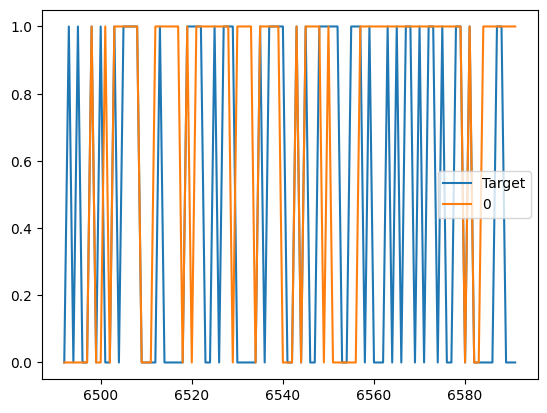

In [18]:
combined.plot()